# HBV hydrological model forced with ERA5 forcing data
In this notebook we will demonstrate how to generate forcing data for the HBV hydrological model from the ERA5 dataset using the eWaterCycle platform. It is assumed that you already have seen [this notebook which explains the basics of the HBV model and generating forcing using eWaterCycle](example_model_run_HBV_camels_catchment_camels_forcing.ipynb). This notebooks purely focuses on the differences when generating forcing from ERA5.

Below a few collapsed cells are identical to those from that notebook.

In [1]:
# General python
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import json

# Niceties
from rich import print

In [2]:
# General eWaterCycle
import ewatercycle
import ewatercycle.forcing

In [3]:
# Load settings
# Read from the JSON file
with open("settings.json", "r") as json_file:
    settings = json.load(json_file)

In [4]:
print(settings)

{
    'caravan_id': 'hysets_01371500',
    'calibration_start_date': '1997-08-01T00:00:00Z',
    'calibration_end_date': '2007-07-31T00:00:00Z',
    'validation_start_date': '2007-08-01T00:00:00Z',
    'validation_end_date': '2010-07-31T00:00:00Z',
    'future_start_date': '2027-08-01T00:00:00Z',
    'future_end_date': '2047-08-31T00:00:00Z',
    'CMIP_info': {
        'dataset': ['MPI-ESM1-2-HR'],
        'ensembles': ['r1i1p1f1'],
        'experiments': ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585'],
        'project': 'CMIP6',
        'frequency': 'day',
        'grid': 'gn',
        'variables': ['pr', 'tas', 'rsds']
    },
    'base_path': '/home/rhut/ewatercycleClimateImpact/HBV',
    'path_caravan': '/home/rhut/ewatercycleClimateImpact/HBV/data/hysets_01371500/caravan',
    'path_ERA5': '/home/rhut/ewatercycleClimateImpact/HBV/data/hysets_01371500/ERA5',
    'path_CMIP6': '/home/rhut/ewatercycleClimateImpact/HBV/data/hysets_01371500/CMIP6',
    'path_shape': '/home/rhut/ewatercycleClimateImpact/HBV/data/hysets_01371500/caravan/hysets_01371500.shp'
}

## Generate or load forcing
Here we generate forcing for the HBV model, from a climate model, for different scenarios

## CMIP future forcing

MPI-ESM1-2-HR

ssp126

r1i1p1f1

LumpedMakkinkForcing(
    start_time='2027-08-01T00:00:00Z',
    end_time='2047-08-31T00:00:00Z',
    directory=PosixPath('/home/rhut/ewatercycleClimateImpact/HBV/data/hysets_01371500/CMIP6/MPI-ESM1-2-HR/ssp126/r1
i1p1f1/work/diagnostic/script'),
    shape=PosixPath('/home/rhut/ewatercycleClimateImpact/HBV/data/hysets_01371500/caravan/hysets_01371500.shp'),
    filenames={
        'pr': 'CMIP6_MPI-ESM1-2-HR_day_ssp126_r1i1p1f1_pr_gn_2027-2047.nc',
        'tas': 'CMIP6_MPI-ESM1-2-HR_day_ssp126_r1i1p1f1_tas_gn_2027-2047.nc',
        'rsds': 'CMIP6_MPI-ESM1-2-HR_day_ssp126_r1i1p1f1_rsds_gn_2027-2047.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

ssp245

r1i1p1f1

LumpedMakkinkForcing(
    start_time='2027-08-01T00:00:00Z',
    end_time='2047-08-31T00:00:00Z',
    directory=PosixPath('/home/rhut/ewatercycleClimateImpact/HBV/data/hysets_01371500/CMIP6/MPI-ESM1-2-HR/ssp245/r1
i1p1f1/work/diagnostic/script'),
    shape=PosixPath('/home/rhut/ewatercycleClimateImpact/HBV/data/hysets_01371500/caravan/hysets_01371500.shp'),
    filenames={
        'pr': 'CMIP6_MPI-ESM1-2-HR_day_ssp245_r1i1p1f1_pr_gn_2027-2047.nc',
        'tas': 'CMIP6_MPI-ESM1-2-HR_day_ssp245_r1i1p1f1_tas_gn_2027-2047.nc',
        'rsds': 'CMIP6_MPI-ESM1-2-HR_day_ssp245_r1i1p1f1_rsds_gn_2027-2047.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

ssp370

r1i1p1f1

LumpedMakkinkForcing(
    start_time='2027-08-01T00:00:00Z',
    end_time='2047-08-31T00:00:00Z',
    directory=PosixPath('/home/rhut/ewatercycleClimateImpact/HBV/data/hysets_01371500/CMIP6/MPI-ESM1-2-HR/ssp370/r1
i1p1f1/work/diagnostic/script'),
    shape=PosixPath('/home/rhut/ewatercycleClimateImpact/HBV/data/hysets_01371500/caravan/hysets_01371500.shp'),
    filenames={
        'pr': 'CMIP6_MPI-ESM1-2-HR_day_ssp370_r1i1p1f1_pr_gn_2027-2047.nc',
        'tas': 'CMIP6_MPI-ESM1-2-HR_day_ssp370_r1i1p1f1_tas_gn_2027-2047.nc',
        'rsds': 'CMIP6_MPI-ESM1-2-HR_day_ssp370_r1i1p1f1_rsds_gn_2027-2047.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

ssp585

r1i1p1f1

LumpedMakkinkForcing(
    start_time='2027-08-01T00:00:00Z',
    end_time='2047-08-31T00:00:00Z',
    directory=PosixPath('/home/rhut/ewatercycleClimateImpact/HBV/data/hysets_01371500/CMIP6/MPI-ESM1-2-HR/ssp585/r1
i1p1f1/work/diagnostic/script'),
    shape=PosixPath('/home/rhut/ewatercycleClimateImpact/HBV/data/hysets_01371500/caravan/hysets_01371500.shp'),
    filenames={
        'pr': 'CMIP6_MPI-ESM1-2-HR_day_ssp585_r1i1p1f1_pr_gn_2027-2047.nc',
        'tas': 'CMIP6_MPI-ESM1-2-HR_day_ssp585_r1i1p1f1_tas_gn_2027-2047.nc',
        'rsds': 'CMIP6_MPI-ESM1-2-HR_day_ssp585_r1i1p1f1_rsds_gn_2027-2047.nc',
        'evspsblpot': 'Derived_Makkink_evspsblpot.nc'
    }
)

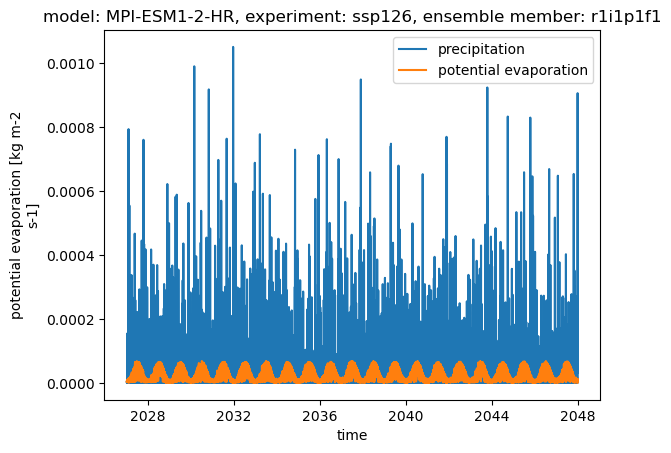

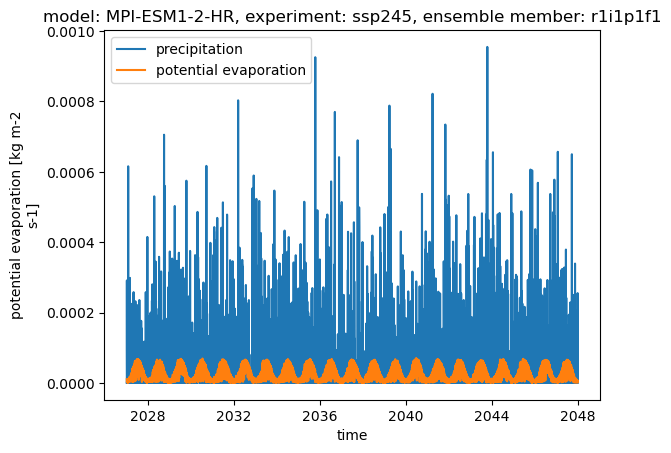

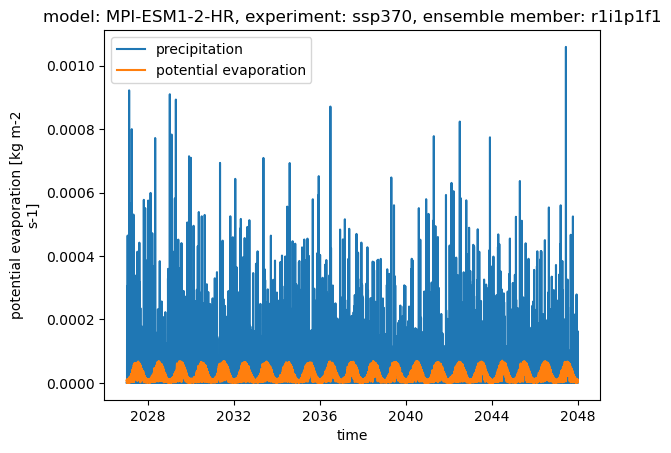

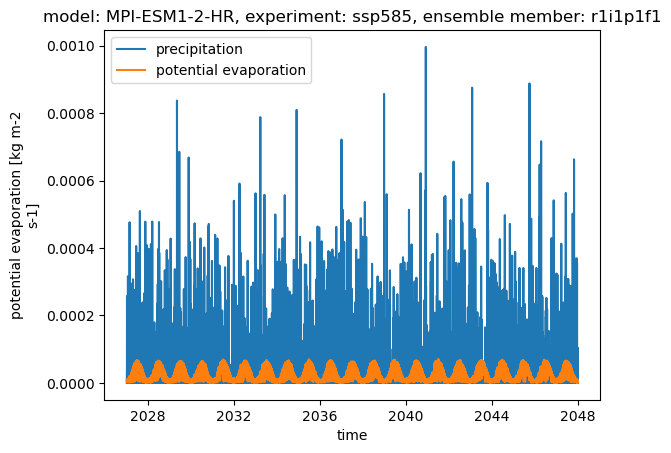

In [5]:
for dataset_name in settings['CMIP_info']['dataset']: 
    # We are asuming one dataset, but this loop allows for multiple
    print(dataset_name)
    
    for experiment_name in settings['CMIP_info']['experiments'][1:]: #skipping historical
        print(experiment_name)
    
        for ensemble_name in settings['CMIP_info']['ensembles']:
            print(ensemble_name)

            cmip_dataset = {
                "dataset": dataset_name,
                "project": settings['CMIP_info']['project'],
                "grid": "gn",
                "exp": experiment_name,
                "ensemble": ensemble_name,
            }
        
            # Create a subfolder for this specific combination of dataset, experiment and ensemblemember
            path_CMIP6 = Path(settings['path_CMIP6']) / cmip_dataset["dataset"] / cmip_dataset["exp"] / cmip_dataset["ensemble"]
            path_CMIP6.mkdir(exist_ok=True, parents=True)

            CMIP_forcing_object = ewatercycle.forcing.sources["LumpedMakkinkForcing"].generate(
               dataset=cmip_dataset,
               start_time=settings['future_start_date'],
               end_time=settings['future_end_date'],
               directory=path_CMIP6,
               shape=settings['path_shape'],
            )
            print(CMIP_forcing_object)

            # Quick plot of the precipitation and potential evaporation data
            plt.figure()
            ds_CMIP = xr.open_mfdataset([CMIP_forcing_object['pr'],CMIP_forcing_object['evspsblpot']])
            ds_CMIP["pr"].plot(label = 'precipitation')
            ds_CMIP["evspsblpot"].plot(label = 'potential evaporation')
            plt.legend()
            plt.title('model: ' + dataset_name + ', experiment: ' + experiment_name + 
                      ', ensemble member: ' + ensemble_name) 